In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv(r"D:\adityafiles\Internships\Imarticus\projects\EDA\employee_wellness_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\adityafiles\\Internships\\Imarticus\\projects\\EDA\\employee_wellness_dataset.csv'

In [11]:
df.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          4
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

In [12]:
df = df.drop(columns=['S.No', 'Timestamp', 'comments', 'no_employees'], errors='ignore')

In [13]:
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,26,Male,United States,WA,No,No,Yes,Sometimes,No,Yes,...,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
1044,29,f,United Kingdom,NaN,No,No,Yes,Often,No,No,...,Don't know,Don't know,Maybe,No,Some of them,No,No,Yes,No,Yes
1045,26,Female,Canada,NaN,No,Yes,Yes,Sometimes,No,Yes,...,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
1046,33,Malr,Italy,NaN,No,Yes,Yes,Sometimes,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No


In [16]:
df.columns = df.columns.str.strip().str.lower()

In [17]:
df=df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 18 to 1043
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        486 non-null    int64 
 1   gender                     486 non-null    object
 2   country                    486 non-null    object
 3   state                      486 non-null    object
 4   self_employed              486 non-null    object
 5   family_history             486 non-null    object
 6   treatment                  486 non-null    object
 7   work_interfere             486 non-null    object
 8   remote_work                486 non-null    object
 9   tech_company               486 non-null    object
 10  benefits                   486 non-null    object
 11  care_options               486 non-null    object
 12  wellness_program           486 non-null    object
 13  seek_help                  486 non-null    object
 14  anonymity    

In [27]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]

In [34]:
df['Gender'] = df['Gender'].str.strip().str.lower()
df['Gender'] = df['Gender'].replace({
    'male': 'Male', 'm': 'Male', 'man': 'Male',
    'female': 'Female', 'f': 'Female', 'woman': 'Female'
})
df.loc[~df['Gender'].isin(['Male', 'Female']), 'Gender'] = 'Other'

C:\Users\kalpe\AppData\Local\Temp\ipykernel_10412\2285409002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].str.strip().str.lower()
C:\Users\kalpe\AppData\Local\Temp\ipykernel_10412\2285409002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].replace({


In [36]:
df['Gender'].value_counts()

Gender
Male      809
Female    198
Other      35
Name: count, dtype: int64

In [24]:
df.columns.tolist()

['S.No',
 'Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

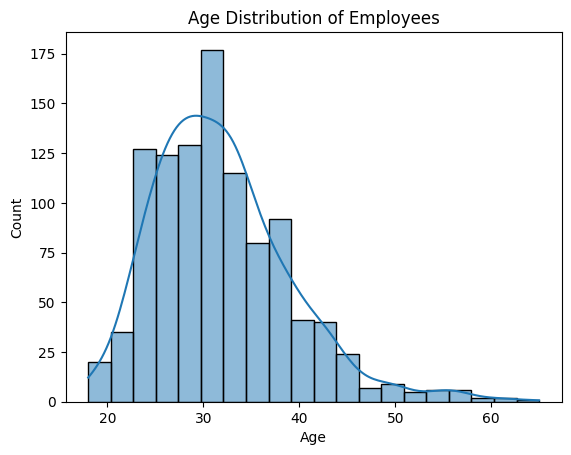

In [28]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


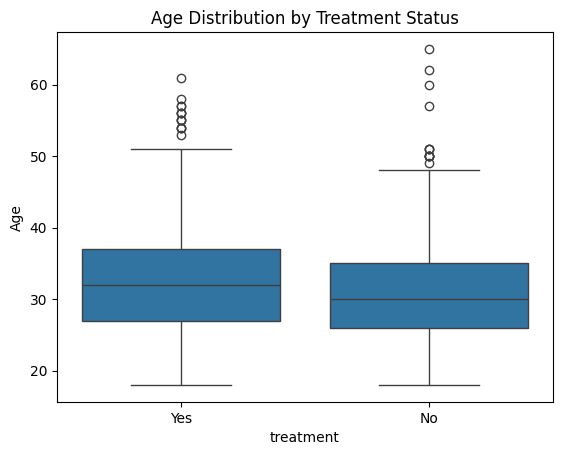

In [43]:
sns.boxplot(x='treatment', y='Age', data=df)
plt.title("Age Distribution by Treatment Status")
plt.show()

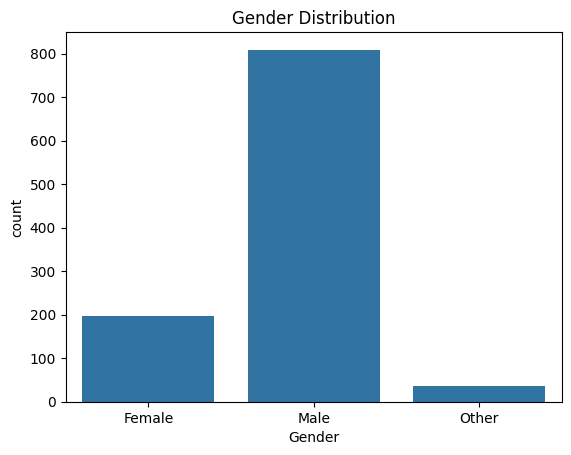

In [37]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

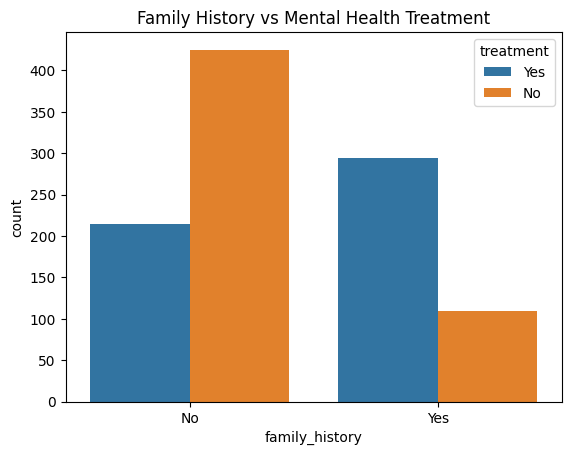

In [38]:
sns.countplot(x='family_history', hue='treatment', data=df)
plt.title("Family History vs Mental Health Treatment")
plt.show()

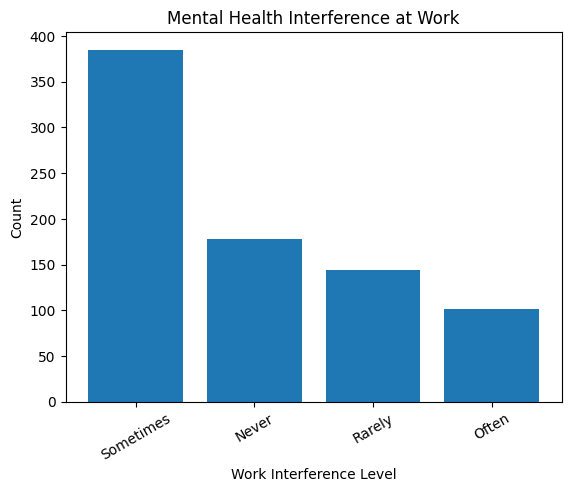

In [39]:
order = df['work_interfere'].value_counts().index

plt.bar(order, df['work_interfere'].value_counts())
plt.title("Mental Health Interference at Work")
plt.xlabel("Work Interference Level")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

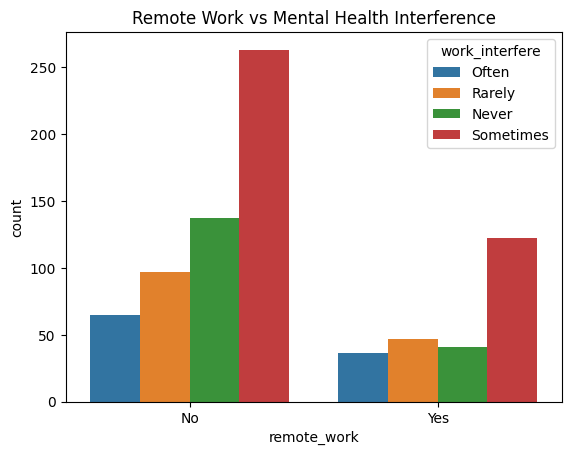

In [45]:
sns.countplot(x='remote_work', hue='work_interfere', data=df)
plt.title("Remote Work vs Mental Health Interference")
plt.show()

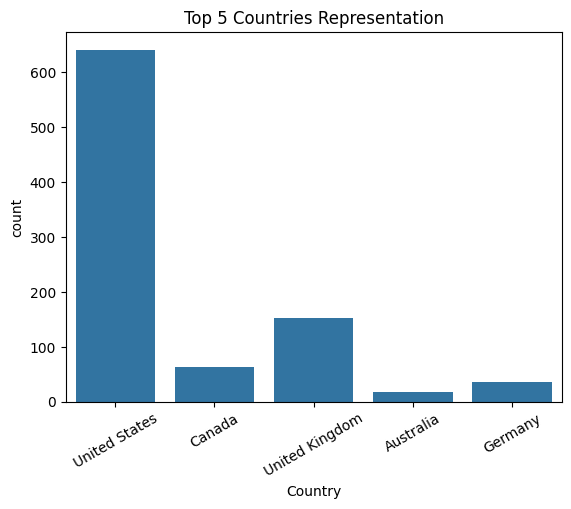

In [49]:
top_countries = df['Country'].value_counts().head(5).index
sns.countplot(x='Country', data=df[df['Country'].isin(top_countries)])
plt.title("Top 5 Countries Representation")
plt.xticks(rotation=30)
plt.show()

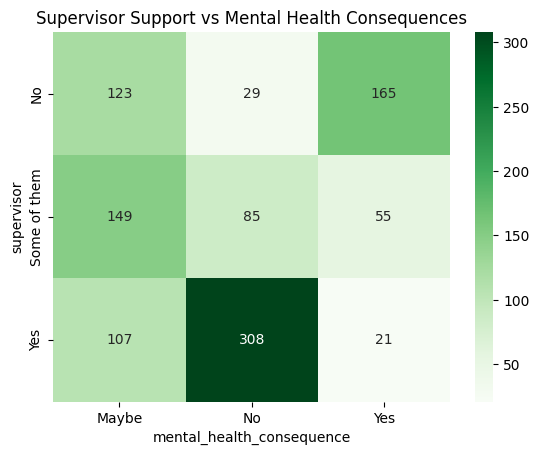

In [46]:
pivot_sup = pd.crosstab(df['supervisor'], df['mental_health_consequence'])

sns.heatmap(pivot_sup, annot=True, fmt='d', cmap='Greens')
plt.title("Supervisor Support vs Mental Health Consequences")
plt.show()